<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/TensorFlow/_008_neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import time
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [7]:
# Download content and style images
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg',
                                       'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg',
                                       cache_dir='/content')
style_path = tf.keras.utils.get_file('kandinsky5.jpg',
                                     'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
                                     cache_dir='/content')

83281/83281 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
195196/195196 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
print(content_path)
print(style_path)

/content/datasets/YellowLabradorLooking_new.jpg
/content/datasets/kandinsky5.jpg


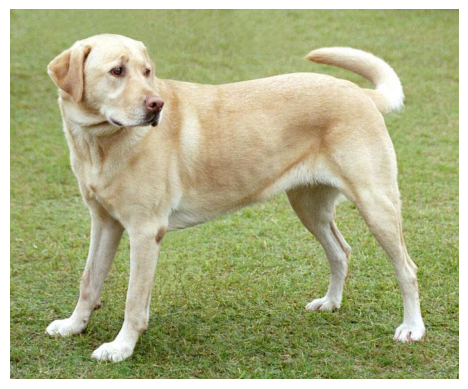

In [34]:
content_img = Image.open(content_path).convert("RGB")
content_array = np.array(content_img).astype(np.float32)
content_array = content_array / 255.0
plt.imshow(content_array)
plt.axis('off')
plt.show()

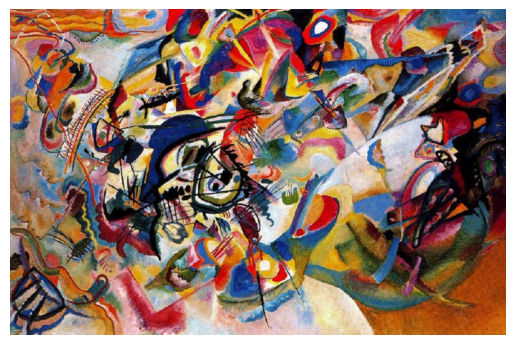

In [35]:
style_img = Image.open(style_path).convert("RGB")
style_array = np.array(style_img).astype(np.float32)
style_array = style_array / 255.0
plt.imshow(style_array)
plt.axis('off')
plt.show()

In [18]:
content_array.shape , style_array.shape

((577, 700, 3), (657, 1000, 3))

In [22]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [37]:
content_array = tf.expand_dims(content_array, axis=0)
style_array = tf.expand_dims(style_array, axis=0)

In [38]:
# Perform style transfer
stylized_image = hub_model(tf.constant(content_array), tf.constant(style_array))[0]

In [41]:
stylized_image = np.array(stylized_image)

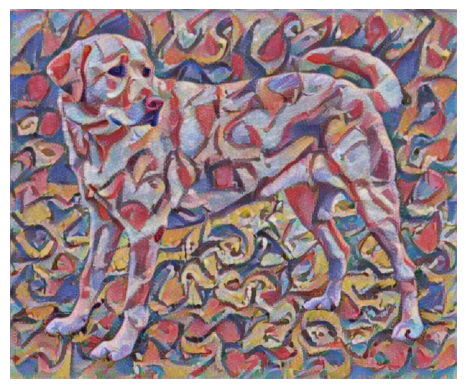

In [44]:
image_array = np.squeeze(stylized_image)  # Shape will be [height, width, channels]

# Display the image
plt.imshow(image_array)
plt.axis('off')  # Hide the axis
plt.show()